# Plotting power curves for all turbines

In [1]:
#import libraries
import pandas as pd
import itertools
%matplotlib inline

In [2]:
#create dataframe from csv
df=pd.read_csv('C:/Users/nithi/Google Drive/Python/Student Data/SCADA.csv',skip_blank_lines=True)

In [3]:
#create pivot table (new dataframe)
power=pd.pivot_table(df,index=['ws_av'],columns=['turbine'],values=['ap_av'])

In [4]:
#removing pivot table values name from heading
power.columns=power.columns.droplevel(0)

In [5]:
#list of column headers (i.e. turbines 1 to 25)
list1=power.columns.tolist()

In [13]:
#create new list for individual subplot titles
list2=['Power curve for turbine %s' % x for x in list1]

In [7]:
#rename index name (x-axis title)
power.index.name='Wind speed (m/s)'

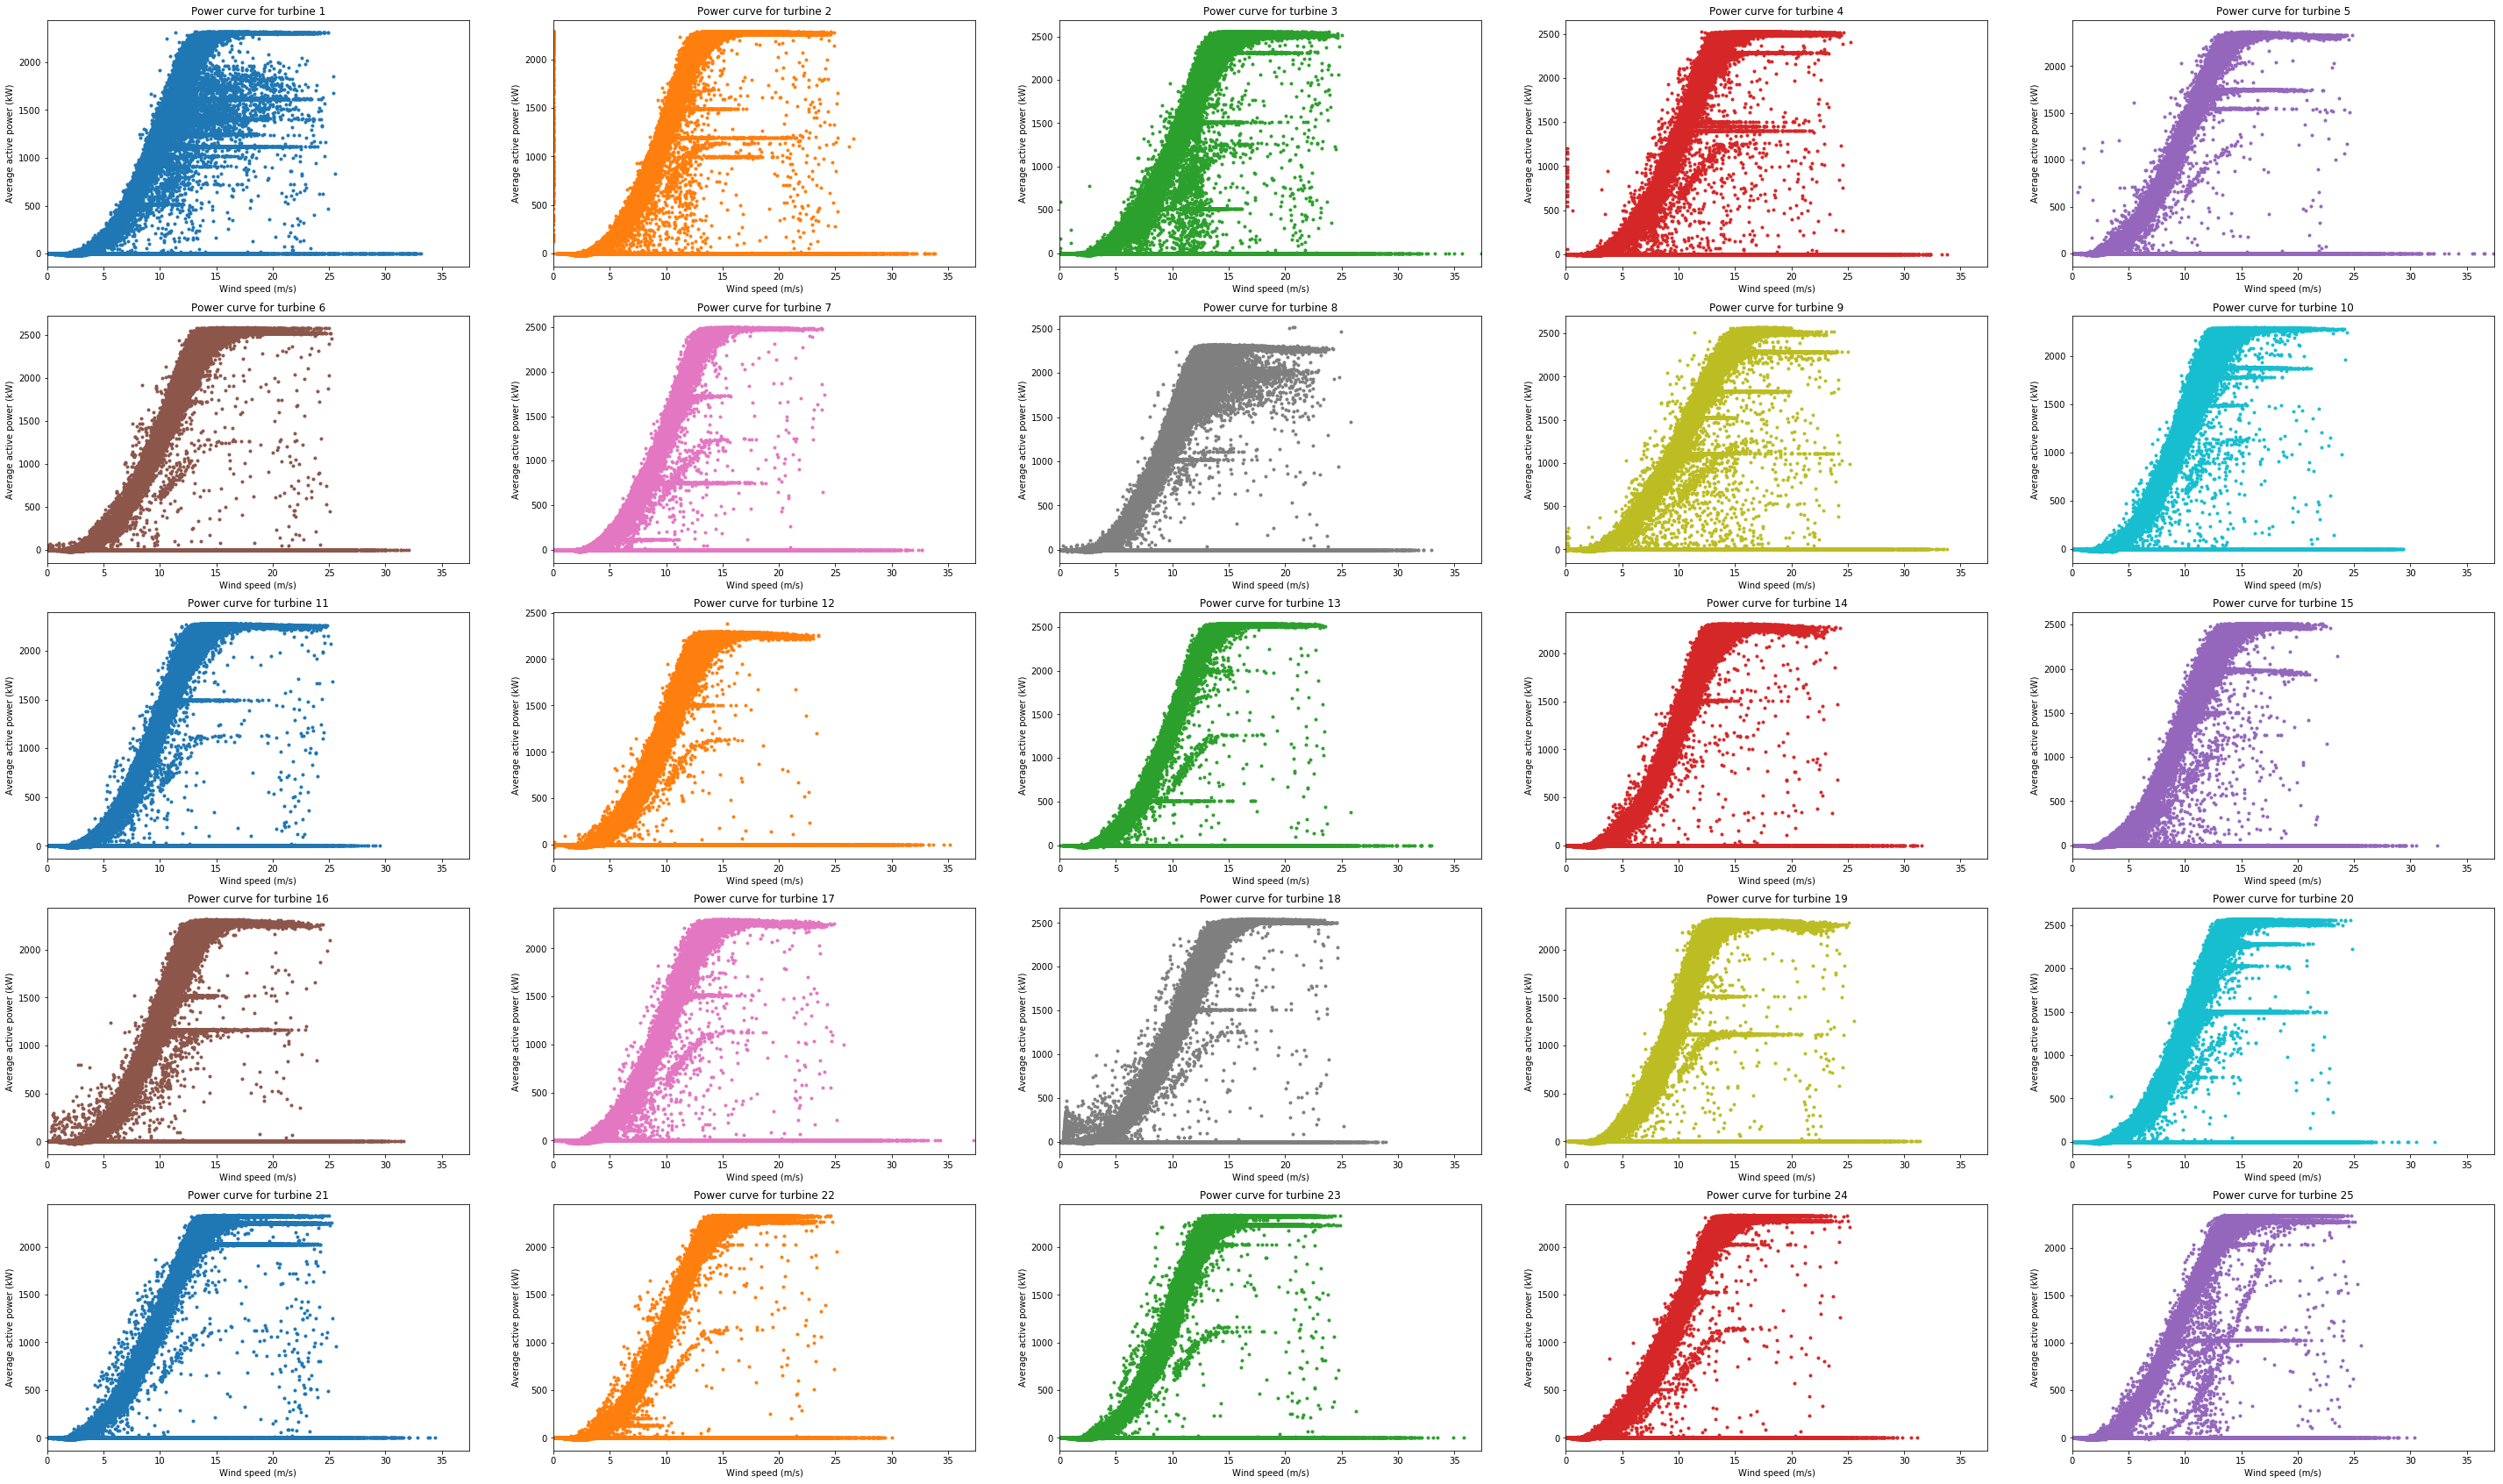

In [14]:
#plotting all columns (i.e., turbines 1 to 25) in the same figure 
ax=power.plot(subplots=True,figsize=(50,30),layout=(5,5),style='.',sharex=False,title=list2,legend=False)
#y-axis title
list4=list(range(0,5)) #based on layout=(x,y), create lists with range(0,x) and (0,y)
list5=list(itertools.product(list4,list4)) #get coordinates of each subplot
for (x,y) in list5:
    ax[x][y].set_ylabel('Average active power (kW)')

## Normalised power curves

In [9]:
#normalise using feature scaling (all values in the range [0,1])
power_norm=(power-power.min())/(power.max()-power.min())
power_norm.index=(power.index-power.index.min())/(power.index.max()-power.index.min())

In [ ]:
#create new list for individual subplot titles
list3=['Normalised power curve for turbine %s' % x for x in list1]

In [10]:
#rename index name
power_norm.index.name='Wind speed'

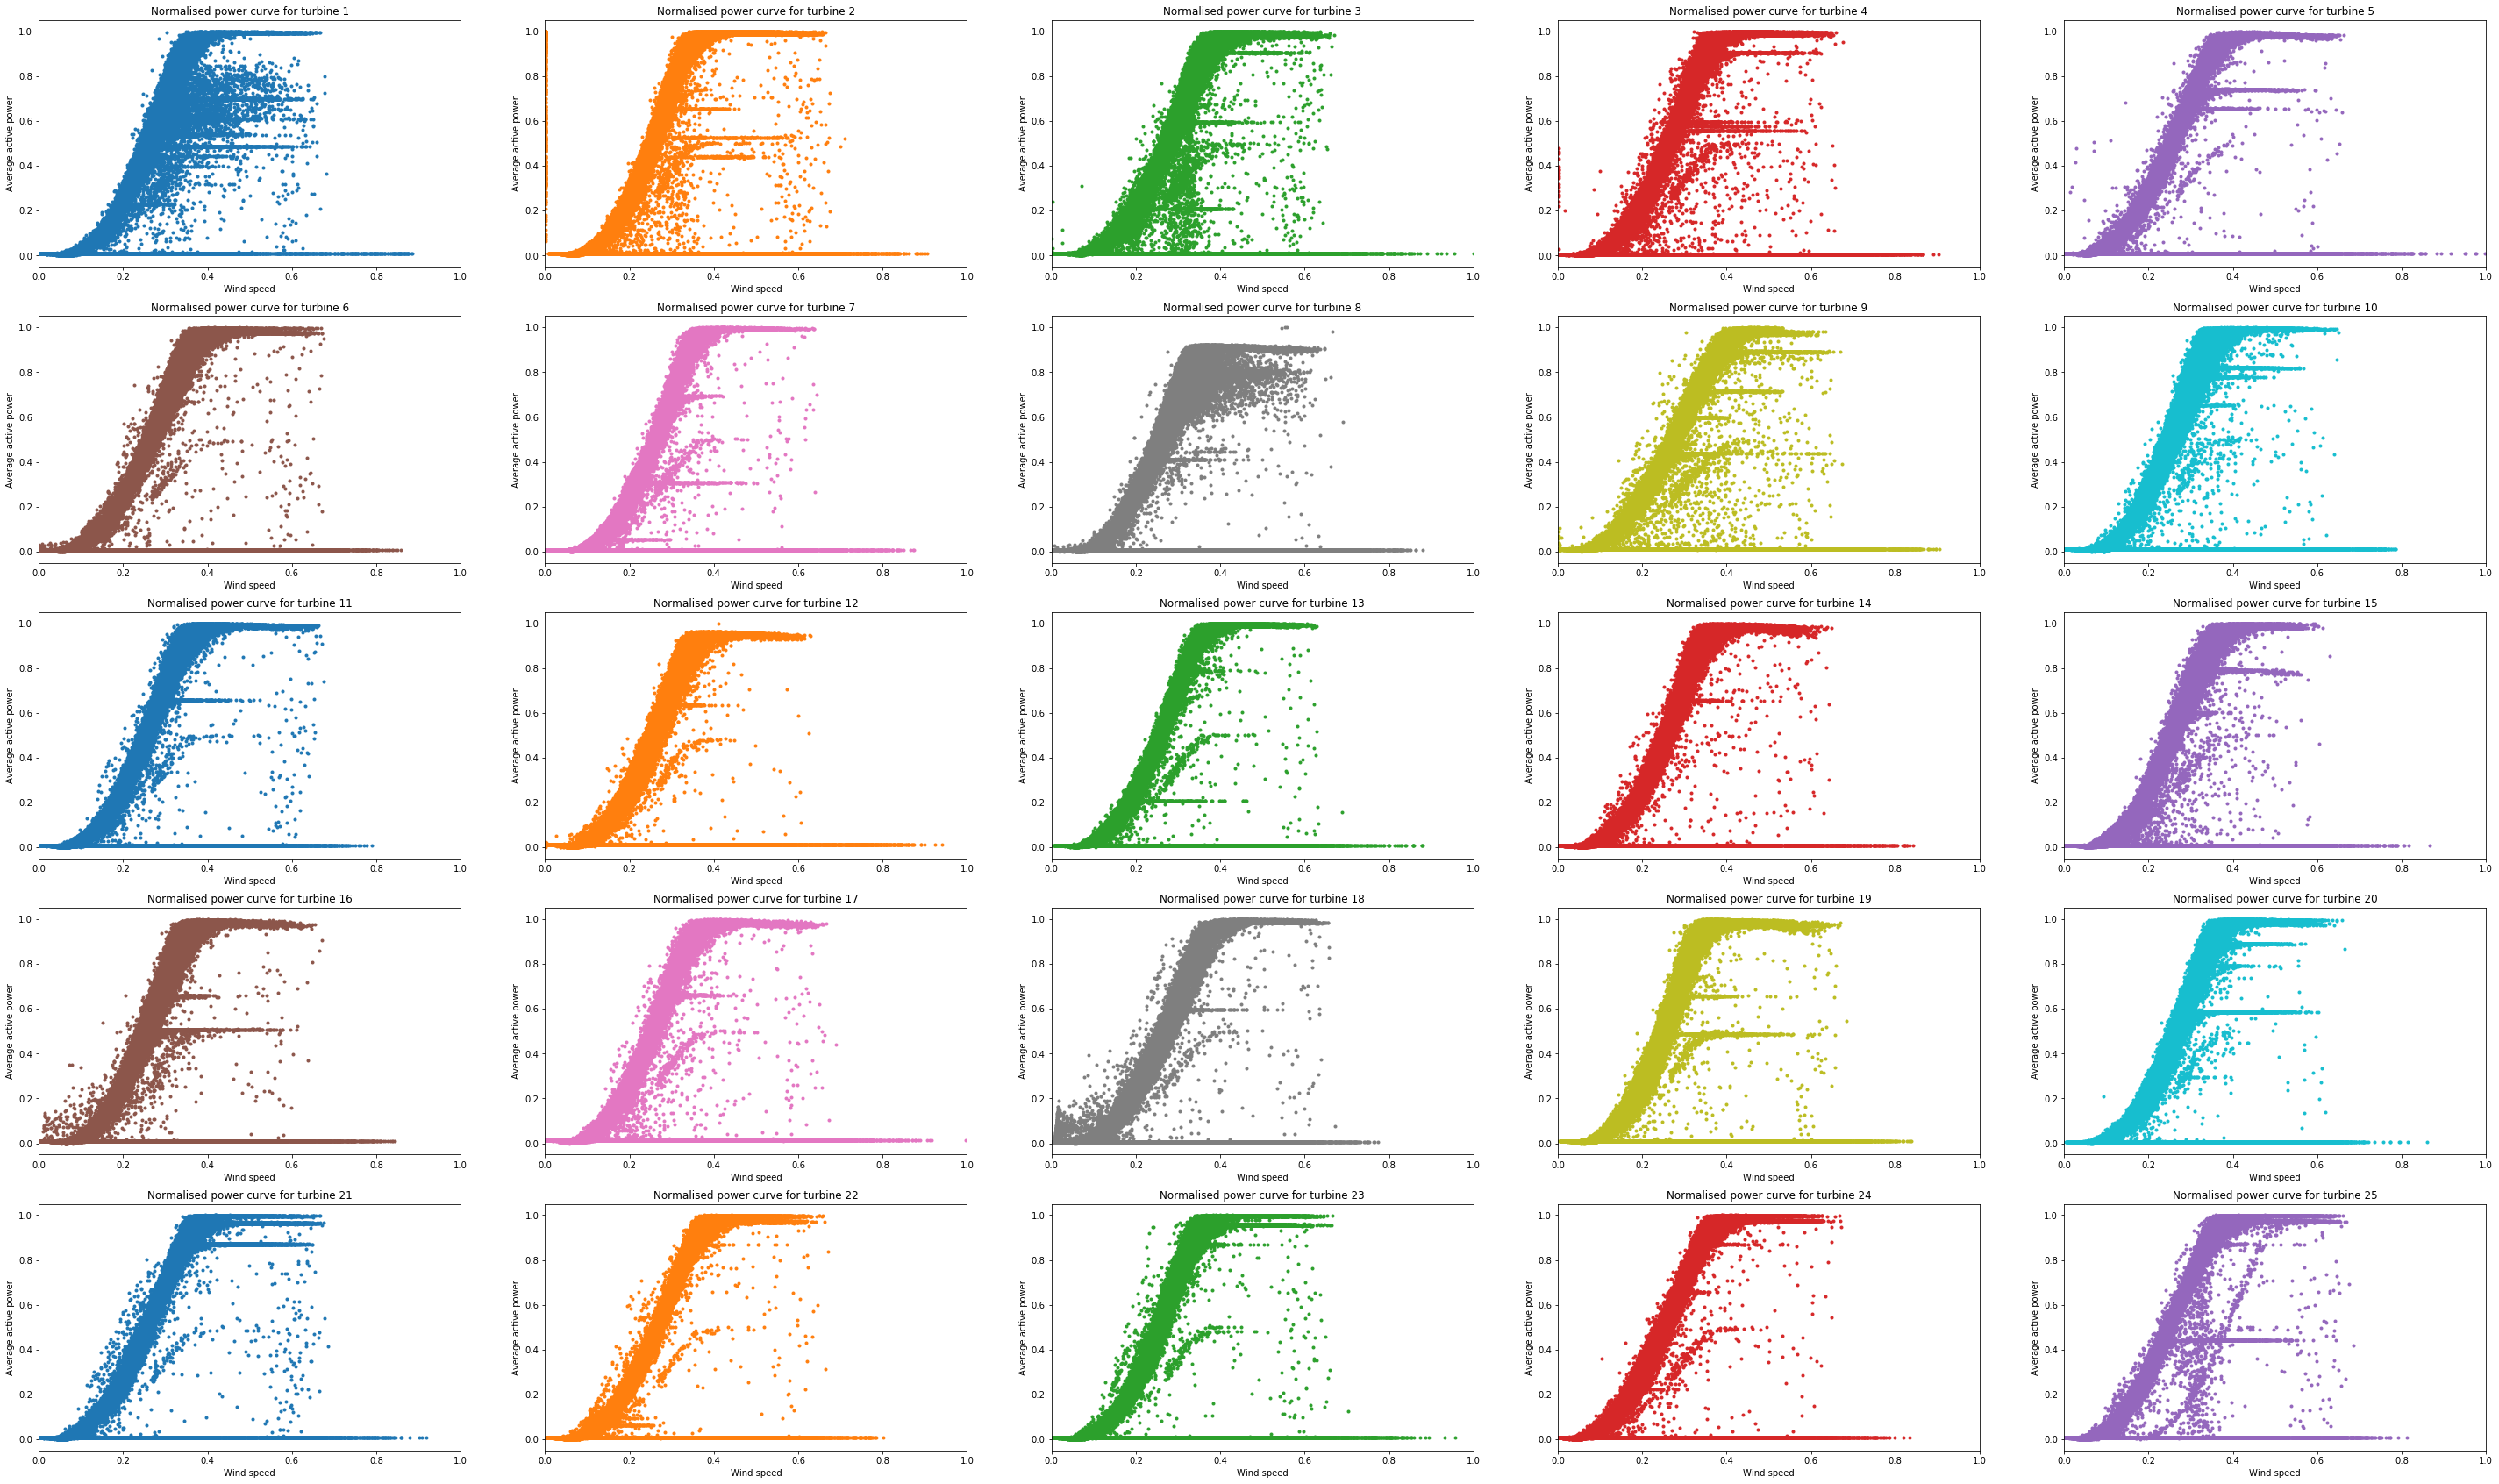

In [11]:
#plotting all columns (i.e., turbines 1 to 25) in the same figure 
ax1=power_norm.plot(subplots=True,figsize=(50,30),layout=(5,5),style='.',sharex=False,title=list3,legend=False)
for (x,y) in list5:
    ax1[x][y].set_ylabel('Average active power')